In [1]:
import pandas as pd
from sklearn.cluster import KMeans  
from collections import Counter
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA,FastICA
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection


In [2]:
data=pd.read_excel('E:\Machine Learning\HW3\Cars.xlsx')
y1=data['Values']
X = data.drop(['Values','Acc or Not'],axis=1)

In [3]:
ICA=FastICA(n_components=2,random_state=12)
ICAComponents=ICA.fit_transform(X)
ICADf=pd.DataFrame(data=ICAComponents, columns=
                        ['Ic1','Ic2'])
finalDf = pd.concat([ICADf, y1], axis = 1)
finalDf.head()

,Ic1,Ic2,Values
0,-0.029463,0.032275,0
1,-0.029463,0.032275,0
2,-0.029463,0.032275,0
3,-0.029463,0.032275,0
4,-0.029463,0.032275,0


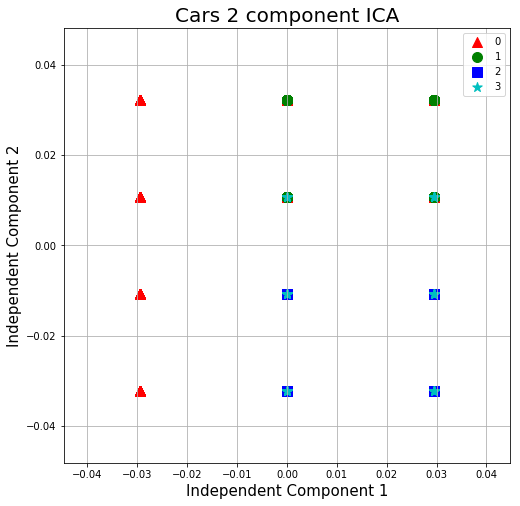

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('Cars 2 component ICA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = finalDf['Values'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Ic1']
               , finalDf.loc[indicesToKeep, 'Ic2']
               , c = color
               , s = 100
              , marker=marker)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2ICA_CARS.png')

In [5]:
kmeans4ic=KMeans(n_clusters=4,n_init=500,max_iter=50,random_state=3)
kmeans4ic.fit(ICAComponents)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=500, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [6]:
yp_k4ic=kmeans4ic.labels_

In [7]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_k4ic[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_k4ic[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_k4ic[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_k4ic[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.40162037037037257
[3, 1, 0, 2]


In [8]:
YP=pd.DataFrame(data=yp_k4ic, columns=
                        ['pre_label'])
predDf=pd.concat([ICADf,YP],axis=1)

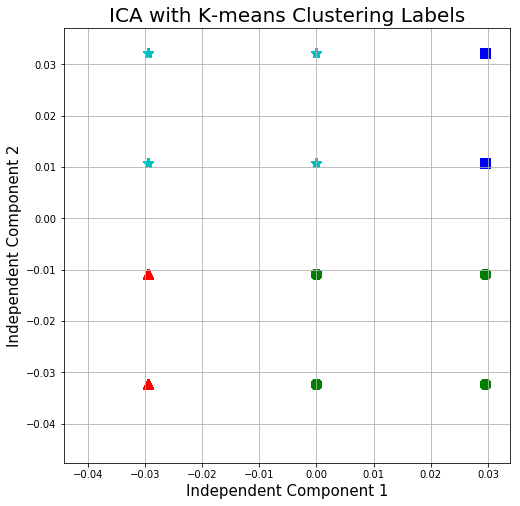

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('ICA with K-means Clustering Labels', fontsize = 20)
targets = [3,1,0,2]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Ic1']
               , predDf.loc[indicesToKeep, 'Ic2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2ICA_KMclustering_CARS.png')

In [21]:
EM_4ic=GaussianMixture(n_components=4,n_init=100,random_state=3,tol=0.0001)
EM_4ic.fit(ICAComponents)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=100, precisions_init=None,
        random_state=3, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [22]:
yp_E4ic=EM_4ic.predict(ICAComponents)
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_E4ic[i]==0 and y1[i]==k[0]:
            accuate=accurate+1/len(y1)
        elif yp_E4ic[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_E4ic[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_E4ic[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.4513888888888925
[2, 0, 3, 1]


In [23]:
YP=pd.DataFrame(data=yp_E4ic, columns=
                        ['pre_label'])
predDf=pd.concat([ICADf,YP],axis=1)

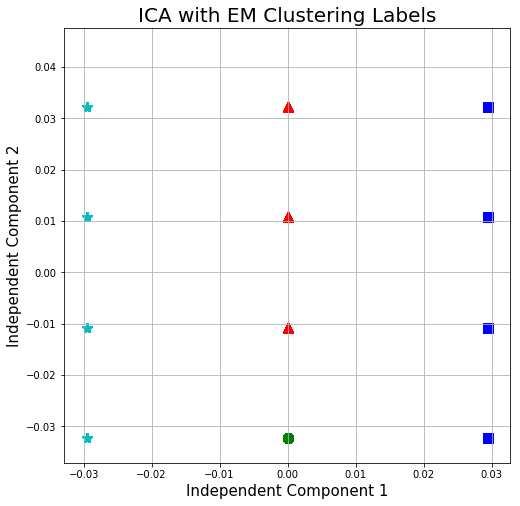

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('ICA with EM Clustering Labels', fontsize = 20)
targets = [2,0,3,1]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Ic1']
               , predDf.loc[indicesToKeep, 'Ic2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2ICA_EMclustering_CARS.png')

In [20]:
RCA=GaussianRandomProjection(n_components=3,random_state=10)
X_RCA=RCA.fit_transform(X)
RCADf=pd.DataFrame(data=X_RCA, columns=
                        ['Rc1','Rc2','Rc3'])
finalRCADf = pd.concat([RCADf, y1], axis = 1)

In [11]:
RCA.components_

array([[ 0.94157385,  0.50577861, -1.09276303, -0.00592828,  0.43935088,
        -0.50917738],
       [ 0.18774504,  0.0767554 ,  0.0030345 , -0.12346099,  0.30619576,
         0.85067589]])

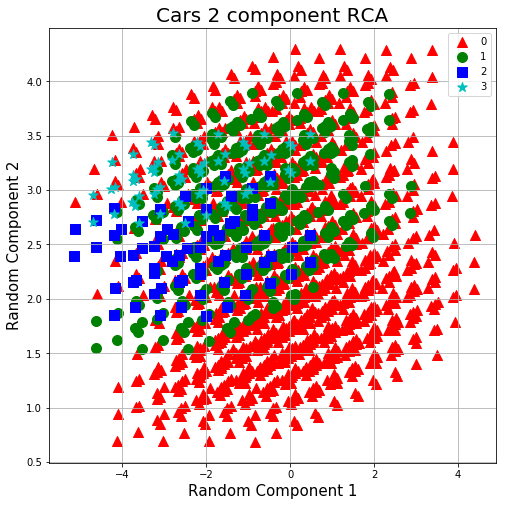

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('Cars 2 component RCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = finalRCADf['Values'] == target
    ax.scatter(finalRCADf.loc[indicesToKeep, 'Rc1']
               , finalRCADf.loc[indicesToKeep, 'Rc2']
               , c = color
               , s = 100
              , marker=marker)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2RCA_CARS.png')

In [21]:
kmeans4Rc=KMeans(n_clusters=4,n_init=500,max_iter=100,random_state=3)
kmeans4Rc.fit(X_RCA)
yp_k4Rc=kmeans4Rc.labels_

In [22]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_k4Rc[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_k4Rc[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_k4Rc[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_k4Rc[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.2986111111111104
[2, 1, 3, 0]


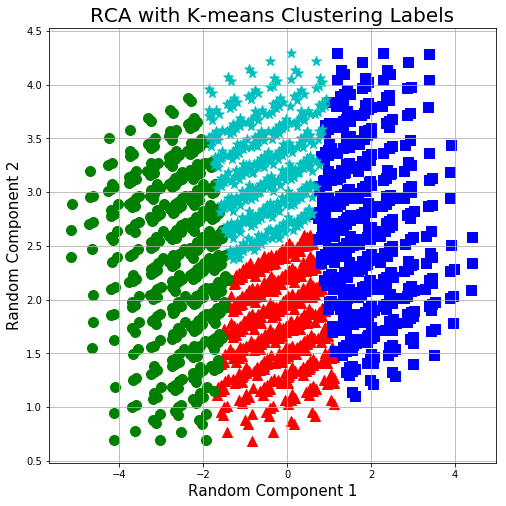

In [15]:
YP=pd.DataFrame(data=yp_k4Rc, columns=
                        ['pre_label'])
predDf=pd.concat([RCADf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('RCA with K-means Clustering Labels', fontsize = 20)
targets = [1,2,3,0]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Rc1']
               , predDf.loc[indicesToKeep, 'Rc2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2RCA_KMclustering_CARS.png')

In [23]:
EM_4Rc=GaussianMixture(n_components=4,n_init=500,random_state=3,tol=0.001)
EM_4Rc.fit(X_RCA)
yp_EM4Rc=EM_4Rc.predict(X_RCA)

In [24]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_EM4Rc[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_EM4Rc[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_EM4Rc[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_EM4Rc[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.42939814814815114
[3, 2, 0, 1]


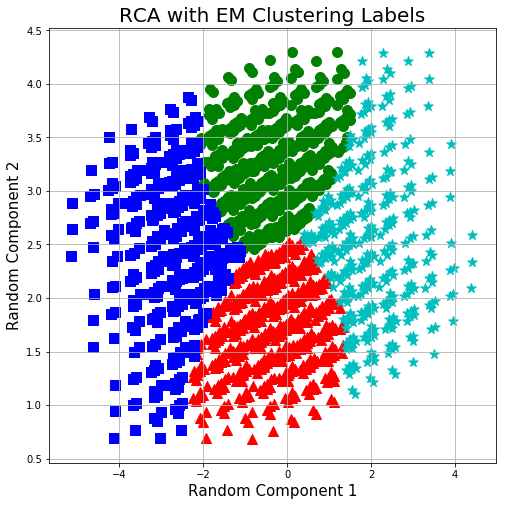

In [19]:
YP=pd.DataFrame(data=yp_EM4Rc, columns=
                        ['pre_label'])
predDf=pd.concat([RCADf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('RCA with EM Clustering Labels', fontsize = 20)
targets = [0,1,2,3]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Rc1']
               , predDf.loc[indicesToKeep, 'Rc2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2RCA_EMclustering_CARS.png')

In [25]:
from sklearn import cluster

In [26]:
agglo=cluster.FeatureAgglomeration(n_clusters=2)
agglo.fit(X)
X_reduced=agglo.transform(X)

In [27]:
agglo.labels_

array([1, 1, 0, 0, 1, 1], dtype=int64)

In [28]:
AGDf=pd.DataFrame(data=X_reduced, columns=
                        ['AGc1','AGc2'])
finalDf = pd.concat([AGDf, y1], axis = 1)

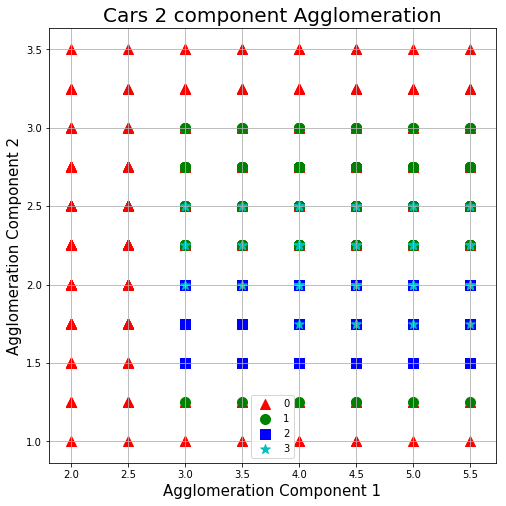

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Agglomeration Component 1', fontsize = 15)
ax.set_ylabel('Agglomeration Component 2', fontsize = 15)
ax.set_title('Cars 2 component Agglomeration', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = finalDf['Values'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'AGc1']
               , finalDf.loc[indicesToKeep, 'AGc2']
               , c = color
               , s = 100
              , marker=marker)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2AGG_CARS.png')

In [30]:
kmeans4AG=KMeans(n_clusters=4,n_init=500,max_iter=100)
kmeans4AG.fit(X_reduced)
yp_k4AG=kmeans4AG.labels_

In [31]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_k4AG[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_k4AG[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_k4AG[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_k4AG[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.38078703703703864
[0, 3, 2, 1]


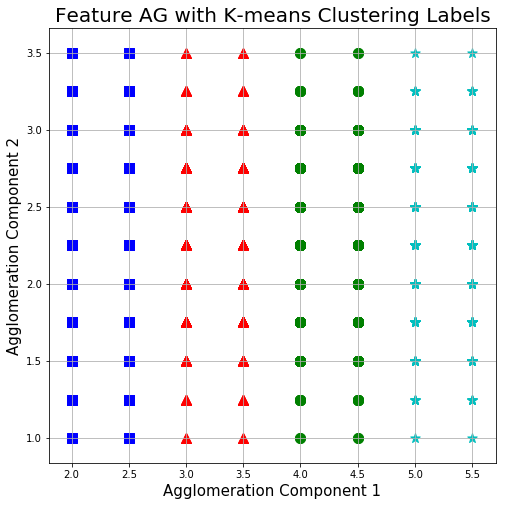

In [32]:
YP=pd.DataFrame(data=yp_k4AG, columns=
                        ['pre_label'])
predDf=pd.concat([AGDf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Agglomeration Component 1', fontsize = 15)
ax.set_ylabel('Agglomeration Component 2', fontsize = 15)
ax.set_title('Feature AG with K-means Clustering Labels', fontsize = 20)
targets = [0,3,2,1]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'AGc1']
               , predDf.loc[indicesToKeep, 'AGc2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2AG_KMclustering_CARS.png')

In [33]:
EM_4AGc=GaussianMixture(n_components=4,n_init=500,random_state=5,tol=0.001)
EM_4AGc.fit(X_reduced)
yp_EM4AGc=EM_4AGc.predict(X_reduced)

In [34]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_EM4AGc[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_EM4AGc[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_EM4AGc[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_EM4AGc[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.39583333333333537
[1, 2, 0, 3]


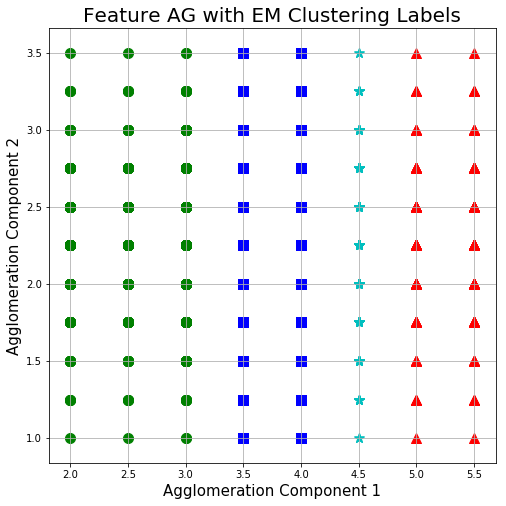

In [35]:
YP=pd.DataFrame(data=yp_EM4AGc, columns=
                        ['pre_label'])
predDf=pd.concat([AGDf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Agglomeration Component 1', fontsize = 15)
ax.set_ylabel('Agglomeration Component 2', fontsize = 15)
ax.set_title('Feature AG with EM Clustering Labels', fontsize = 20)
targets = [1,2,0,3]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'AGc1']
               , predDf.loc[indicesToKeep, 'AGc2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2AG_EMclustering_CARS.png')